# Simple Linear Regression

Involves one independent variable (X) and one dependent variable (Y).

The relationship between the two variables is modeled using a straight line:

$𝑌=𝑎_0+𝑎_1 𝑋+\epsilon$
where:

Y is the dependent variable (output),

X is the independent variable (input),

$a_0$ is the intercept,

$𝑎_1$ is the slope (coefficient),

$\epsilon$ represents the error term.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [47]:
data = sns.load_dataset("tips")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### One-hot encoding transforms each categorical variable into multiple binary columns (0 or 1), making the data numerical and easier for algorithms to process.

In [48]:
data = pd.get_dummies(data, columns=["sex", "smoker", "day", "time"], drop_first=True)

# Display dataset information
print(data.columns)
print(data.shape)
print(data.head())

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')
(244, 9)
   total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2           1          1        0        0        1   
1       10.34  1.66     3           0          1        0        0        1   
2       21.01  3.50     3           0          1        0        0        1   
3       23.68  3.31     2           0          1        0        0        1   
4       24.59  3.61     4           1          1        0        0        1   

   time_Dinner  
0            1  
1            1  
2            1  
3            1  
4            1  


# Bi-Variate Analysis

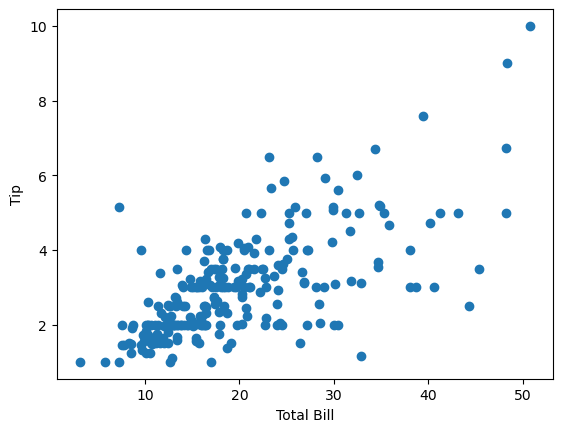

In [49]:
plt.scatter(data.total_bill, data.tip)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [50]:
np.corrcoef(data["total_bill"], data["tip"])[0][1]

0.6757341092113641

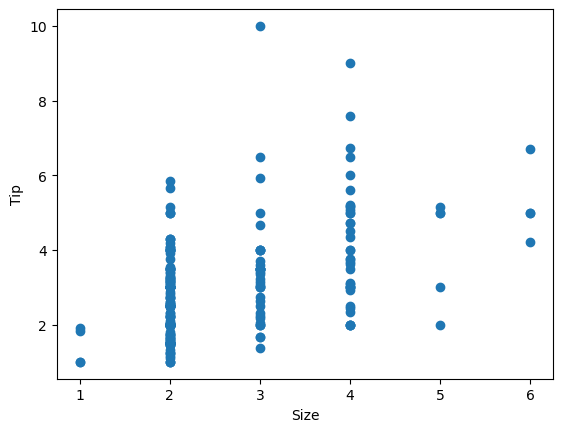

In [51]:
plt.scatter(data["size"], data["tip"])
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

In [52]:
print("Correlation between size and tip:", np.corrcoef(data["size"], data["tip"])[0][1])

Correlation between size and tip: 0.48929877523035775


# feature - X and target variable - y for simple linear regression

The equation of the line is tip = a0 + a1 * total_bill

In [60]:
X = data["total_bill"].values.reshape(-1, 1)  
y = data["tip"]

# Spliting the dataset into training and testing sets
# Training the model

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [62]:
# coefficients and intercept
print("Coefficient (a1):", regr.coef_)
print("Intercept (a0):", regr.intercept_)

Coefficient (a1): [0.0968534]
Intercept (a0): 1.0285439454607277


In [63]:
# Predict on test data
y_pred = regr.predict(X_test)
y_pred

array([2.7321953 , 2.79999268, 2.91621676, 1.73073111, 2.60434881,
       1.58545101, 2.76415692, 3.28813383, 2.7864332 , 4.38451435,
       3.47699796, 3.47021823, 2.39127132, 2.28763818, 2.32831661,
       3.97288739, 1.83726986, 2.38449158, 2.84745085, 3.26585755,
       3.93995723, 3.05471713, 2.57819839, 2.48521912, 2.33703342,
       2.61693975, 2.20628132, 3.91477534, 3.4779665 , 2.55592211,
       2.45519457, 2.23727441, 2.52202341, 2.05422148, 2.79999268,
       2.32541101, 2.66827205, 2.02903959, 5.7094689 , 2.57626132,
       1.85954614, 2.23243174, 2.54817383, 3.91961801, 2.26439336,
       2.67214619, 2.79515001, 3.11864037, 2.68183153])

In [64]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Root Mean Squared Error: 0.9062610353957787
R² Score: 0.5906895098589039


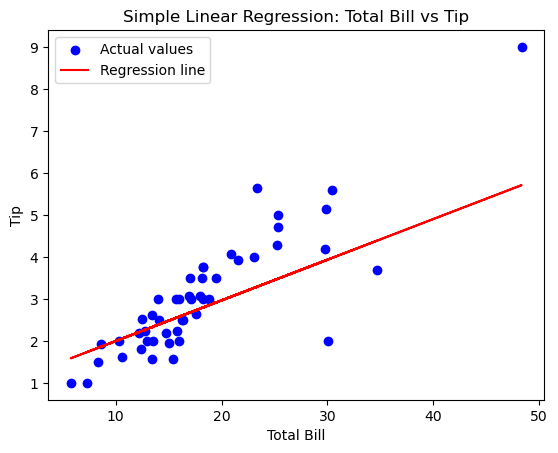

In [44]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.legend()
plt.show()

# Multiple Linear Regression
Involves two or more independent variables $(X_1, X_2, ... X_n)$ to predict a single dependent variable (Y).

The equation extends to multiple features:

$𝑌=𝑎_0+𝑎_1𝑋_1+𝑎_2𝑋_2+...+𝑎_𝑛𝑋_𝑛+𝜖$

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


data = sns.load_dataset("tips")

data = pd.get_dummies(data, columns=["sex", "smoker", "day", "time"], drop_first=True)


print(data.columns)
print(data.shape)
print(data.head())

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')
(244, 9)
   total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2           1          1        0        0        1   
1       10.34  1.66     3           0          1        0        0        1   
2       21.01  3.50     3           0          1        0        0        1   
3       23.68  3.31     2           0          1        0        0        1   
4       24.59  3.61     4           1          1        0        0        1   

   time_Dinner  
0            1  
1            1  
2            1  
3            1  
4            1  


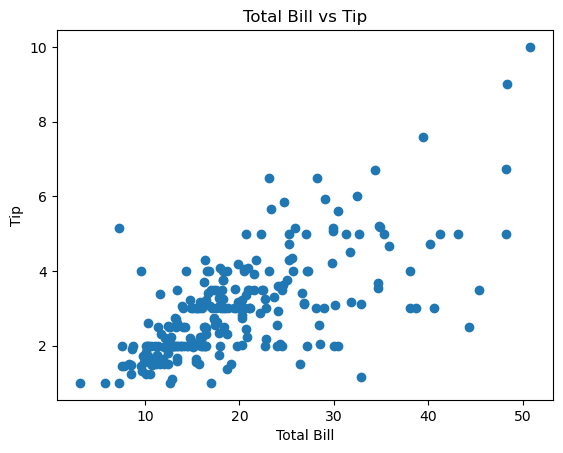

In [66]:
# Bi-Variate Analysis

plt.scatter(data.total_bill, data.tip)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

In [72]:
print("Correlation between Total Bill and Tip:", np.corrcoef(data["total_bill"],data["tip"])[0][1])
print("Correlation between Size and Tip:", np.corrcoef(data["size"], data["tip"])[0][1])

Correlation between Total Bill and Tip: 0.6757341092113641
Correlation between Size and Tip: 0.48929877523035775


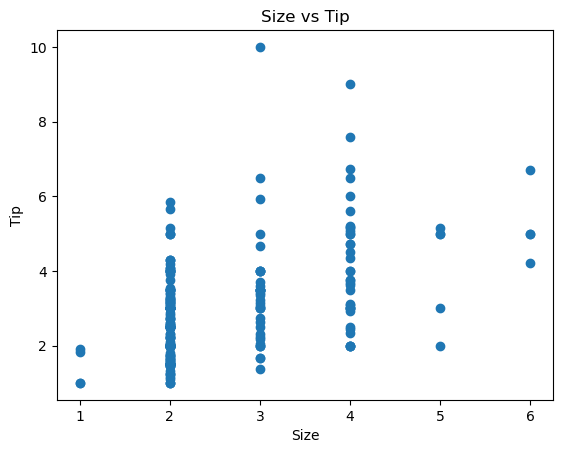

In [73]:
# Scatter plot
plt.scatter(data["size"], data["tip"])
plt.xlabel('Size')
plt.ylabel('Tip')
plt.title('Size vs Tip')
plt.show()

# features (x_1,x_2, . . .) and target variable (y)

In [74]:
X = data.drop(columns=['tip']) 
y = data['tip']  

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


regr = LinearRegression()
regr.fit(X_train, y_train)

print("Coefficients (a1, a2, ...):", regr.coef_)
print("Intercept (a0):", regr.intercept_)

y_pred = regr.predict(X_test)
print("\n",y_pred)

Coefficients (a1, a2, ...): [ 0.08561436  0.20932895  0.00737383  0.03190042  0.55434395  0.29175625
  0.39538227 -0.45105997]
Intercept (a0): 0.7532274919255837

 [2.75976768 2.99712626 2.81673204 1.4632311  3.12654885 1.77482578
 2.54679105 3.11359077 2.88681115 4.50140326 3.18428659 3.17091975
 2.3527022  2.29224593 2.87517409 4.16944264 1.92603957 2.24308317
 2.3679374  3.30322842 3.79547836 2.84290839 2.5417152  2.43574813
 2.32853543 2.58333477 2.76729999 4.59978345 3.73195325 2.40199442
 2.31295548 2.27962689 2.46828159 1.92661159 2.71399481 2.30185826
 2.71063603 2.09555601 5.60088215 3.34295006 2.25147162 2.27534617
 2.56519997 4.33905752 2.11239476 2.81768662 2.60608807 2.99566606
 2.72262204]


# Evaluate the model

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 0.9454731736865677
R² Score: 0.5545031052534983


# Actual vs Predicted values

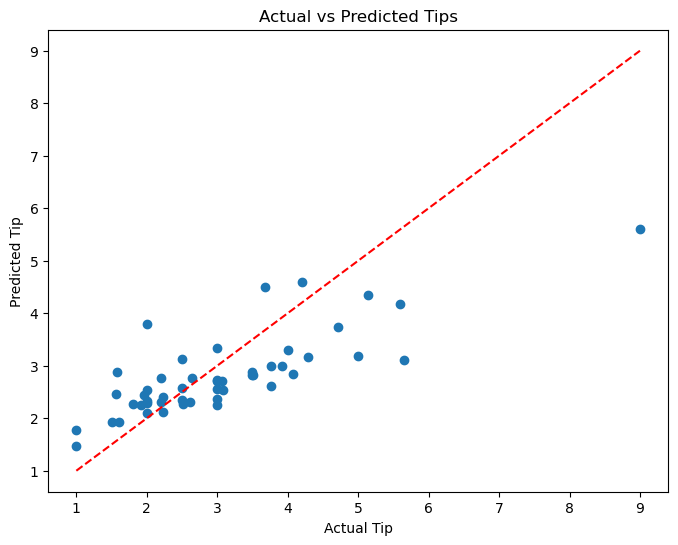

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual vs Predicted Tips')
plt.show()

In [87]:
X = data.drop(columns=['tip','smoker_No','size']) 
y = data['tip']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


regr = LinearRegression()
regr.fit(X_train, y_train)

print("Coefficients (a1, a2, ...):", regr.coef_)
print("Intercept (a0):", regr.intercept_)

y_pred = regr.predict(X_test)
print("\n",y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Coefficients (a1, a2, ...): [ 0.0978832  -0.00524079  0.51939907  0.33955066  0.50814615 -0.52487179]
Intercept (a0): 1.0752247089985927

 [2.61166905 2.68018729 2.96624261 1.59431599 3.18194264 1.6273396
 2.64397051 3.3421141  2.82983834 4.45015191 3.35915007 3.35753903
 2.43571568 2.34246551 2.90821631 4.03414832 1.88730864 2.26026837
 2.38335861 3.31960096 3.83227254 2.93237932 2.6413559  2.53066238
 2.39762673 2.67526839 2.78488348 3.98690326 3.53396517 2.42828084
 2.32648232 2.29156625 2.56785799 1.92124587 2.84878278 2.36391431
 2.54182535 2.08111737 5.62059859 3.15355652 2.43446163 2.28667209
 2.42569097 3.97507177 2.13365241 2.71433617 2.67529313 3.1708185
 2.555529  ]
Root Mean Squared Error (RMSE): 0.9455236501671272
R² Score: 0.5544555360231095
